In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from nicks_plot_utils import *
from lmfit import Model
from lmfit.models import *

Welcome to JupyROOT 6.22/09


In [8]:
df = pd.read_csv("crossSections/full_results_10.csv", index_col=0)
print(df.w_left.unique())
print(df.q2_left.unique())

df.head()

[1.1  1.12 1.14 1.16 1.18 1.2  1.22 1.24 1.26 1.28 1.3  1.32 1.34 1.36
 1.38 1.4  1.42 1.44 1.46 1.48 1.5  1.52 1.54 1.56 1.58 1.6  1.62 1.64
 1.66 1.68 1.7  1.72 1.74 1.76 1.78 1.8 ]
[1.1  1.33 1.56 1.87 2.23 2.66]


,w_left,w_right,q2_left,q2_right,cos_theta,x,y,err
0,1.1,1.12,1.1,1.33,-1.0,0.314159,2.464547e+07,1.732051
1,1.1,1.12,1.1,1.33,-1.0,0.942478,1.643031e+07,1.414214
2,1.1,1.12,1.1,1.33,-1.0,1.570796,1.643031e+07,1.414214
3,1.1,1.12,1.1,1.33,-1.0,4.084070,2.464547e+07,1.732051
4,1.1,1.12,1.1,1.33,-1.0,4.712389,5.750610e+07,2.645751


In [14]:
xs = np.linspace(0,2*np.pi,200)
def A(M, B, C):
    if (C > 0 and np.abs(B) <= 4*C):
        return M**2 + B**2/(8*C) + C
    else:
        return M**2 + np.abs(B) - C

def model(x, M, b, c):
    """
    a => sigma_l + sigma_t
    b => epsilon*sigma_tt
    c => Sqrt(2epsilon(1+epsilon))* sigma_lt
    """
    f = A(M, b, c) + b * np.cos(2*x) + c * np.cos(x)
    return f

def fit_model(ax, x, y, color, func=model, error=None):
    # Make model from function
    model = Model(func)
    # Make fit parameters
    params = model.make_params()
    # Make sure to set inital values to 1
    # so fit doesn't fail
    for p in params:
        params[p].set(value=1)

    # Fit the model
    try:
        out = model.fit(y, params, x=x, weights=error if error is not None else 1.0)

    except ValueError as e:
        print(e)
        return None
    except TypeError as e:
        print(e)
        return None

    # Plot the fitted model with output parameters and same x's as model
    ax.plot(xs, out.eval(params=out.params, x=xs),
            linewidth=2.0, c=color, alpha=0.4)
    #dely = out.eval_uncertainty(sigma=1, x=xs)
    #ax.fill_between(xs, out.eval(params=out.params, x=xs)-dely, 
    #                    out.eval(params=out.params, x=xs)+dely,
    #                    color=color, alpha=0.2)

    return out


In [15]:
def plotOne(w, q2, ct):    
    data = df[(df.w_left == w) & (df.q2_left == q2) & (df.cos_theta == ct)]

    errorCut = (data.err < 100)

    if len(data) == 0 or np.sum(errorCut) <= 3:
        return
    
    dat = data[errorCut]

    fig, ax = plt.subplots(figsize=[12,6])
    maxs = 0.0
    
    w_left = data.w_left.iloc[0]
    w_right = data.w_right.iloc[0]
    q2_left = data.q2_left.iloc[0]
    q2_right = data.q2_right.iloc[0]
    ct_left = data.cos_theta.iloc[0]
    ct_right = np.round(data.cos_theta.iloc[0] + 0.2, 1)
    
    ebar = plt.errorbar(dat.x, dat.y, yerr=dat.err, fmt='.', markersize=10, label=f"$E1D$")
    out = fit_model(ax, dat.x, dat.y, ebar[0].get_color(), error=(1/dat.err)**2)

    ax.legend(loc='upper right')
    ax.set_ylabel(r'$\frac{\mathbf{d}\sigma}{\mathbf{d} \Omega} \left[\frac{\mu b}{sr}\right]$')
    ax.set_xlabel(r'$\phi_{\pi}^{*}$')
    ax.set_title(f"$W~:~[{w_left},{w_right})~GeV~~~Q^2~:~[{q2_left},{q2_right})~GeV^2~~~\cos(\\theta)~:~[{ct_left},{ct_right})$")

    try:
        top = np.max(data.y)
    except ValueError:
        top = np.nan
    


    ax.set_ylim(bottom=0)



    plt.xlim(0, 2*np.pi)
    plt.tight_layout()
    plt.show()

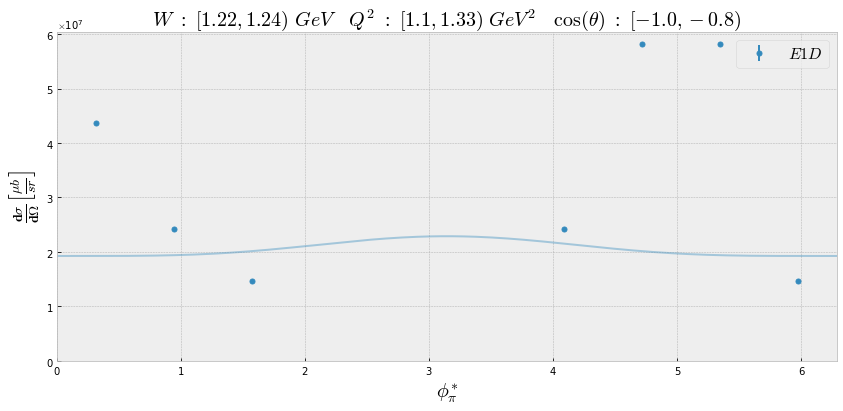

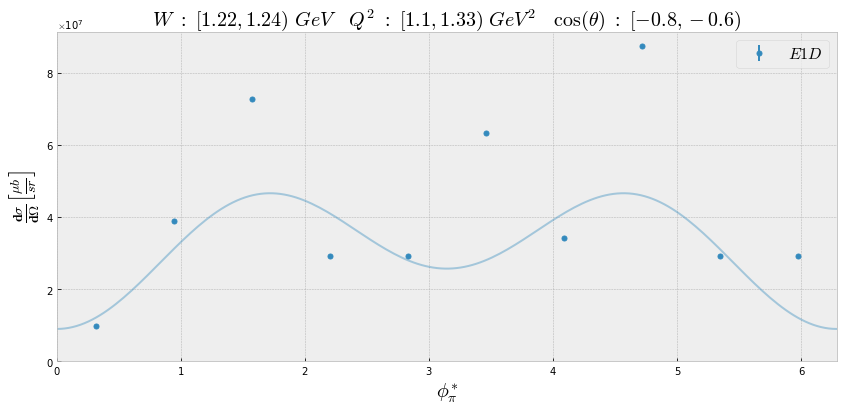

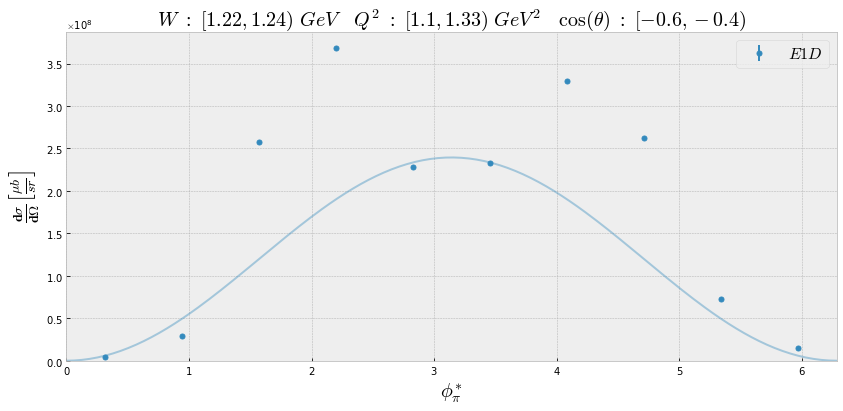

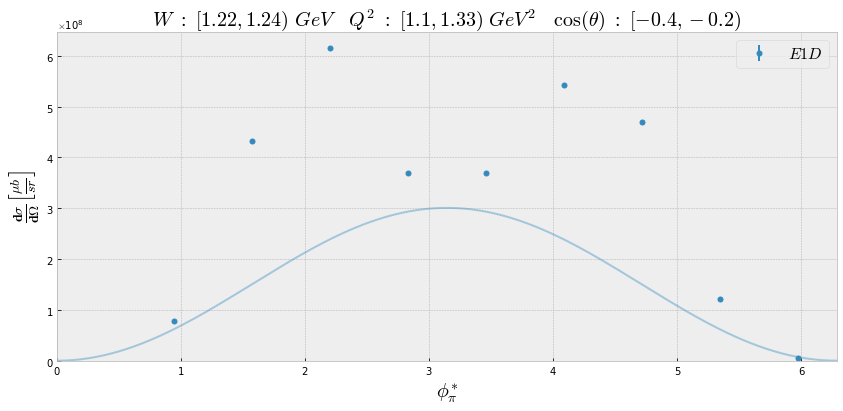

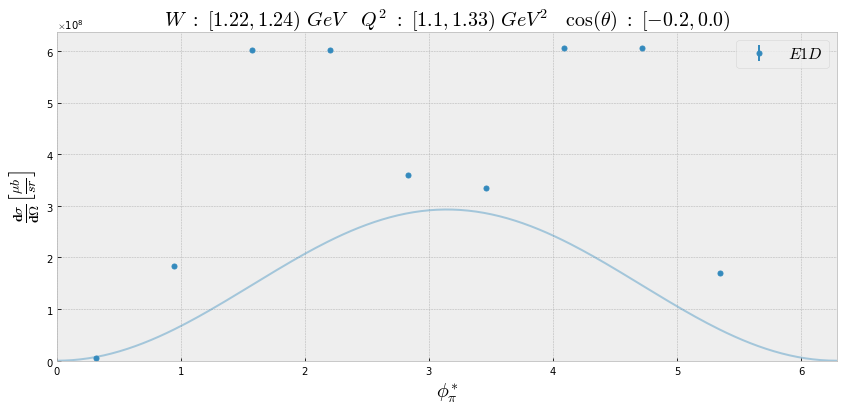

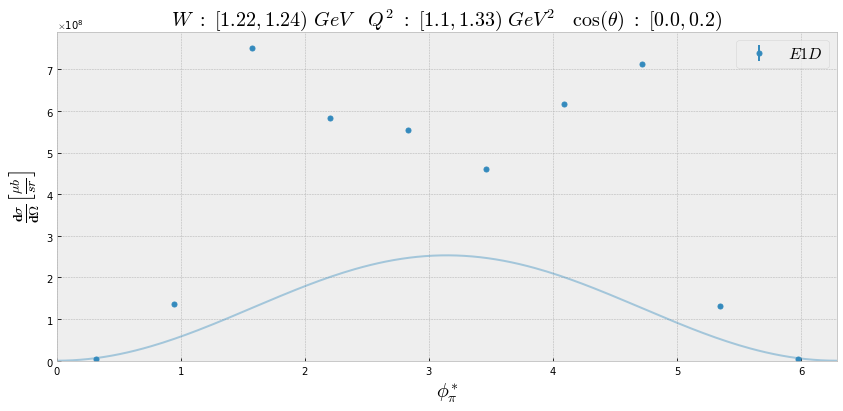

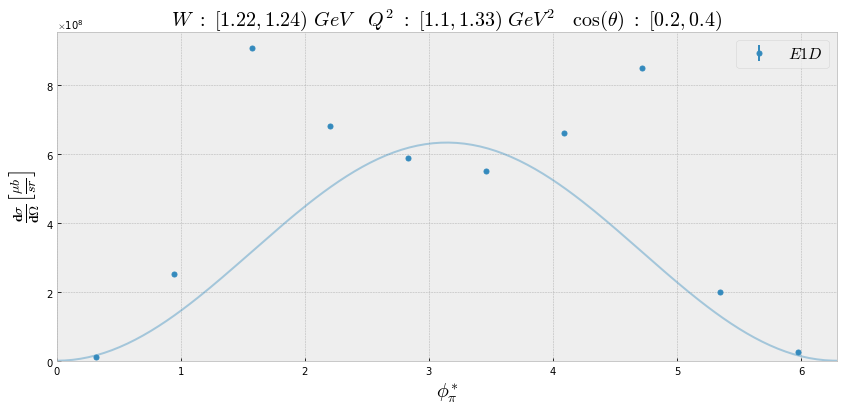

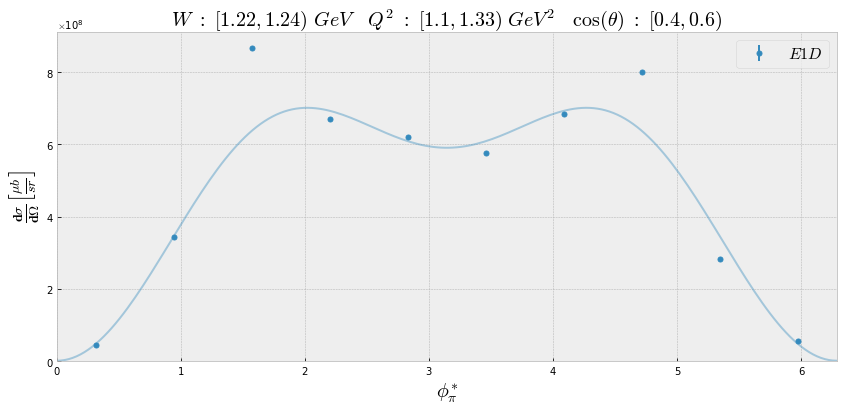

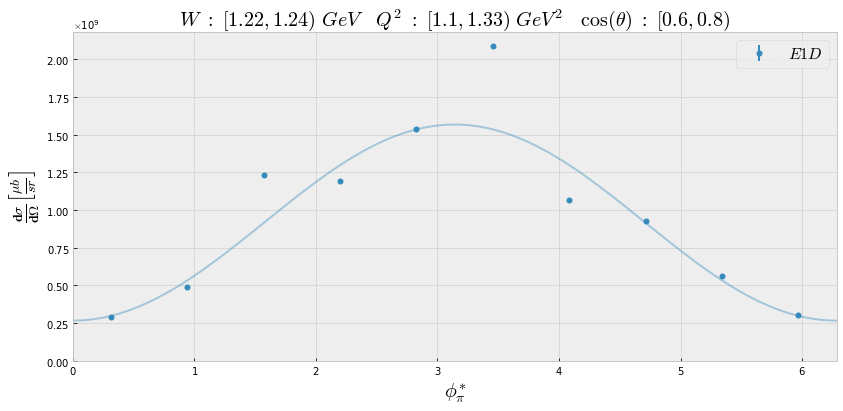

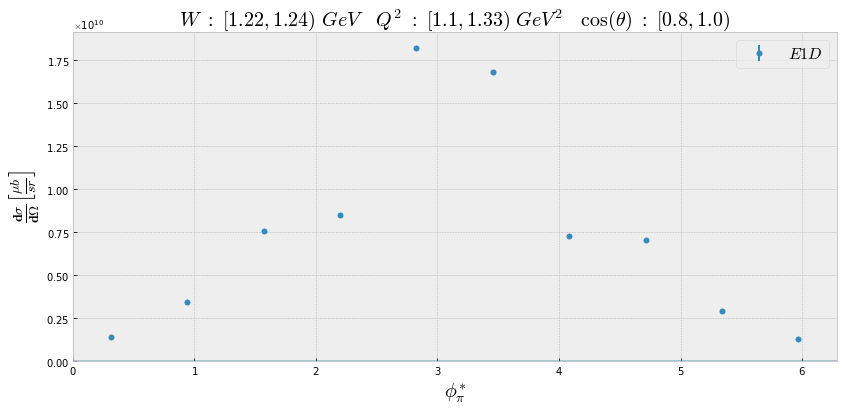

In [16]:
for w in [1.22]:
    for q2 in [1.1]:
        for ct in np.unique(df.cos_theta):
            plotOne(w, q2, ct)